In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas to perform EDA(Exploratory Data Analysis)
import numpy as np  # Importing numpy to perform Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter #Import this to check on the data and count
from sklearn.tree import DecisionTreeRegressor # import ML algorithm to train a model
from sklearn.ensemble import RandomForestRegressor #import ML algorithm to train a model
from sklearn.ensemble import GradientBoostingRegressor #ML algorithm to train a model
from sklearn.linear_model import LinearRegression #ML algorithm to train a model
from sklearn.model_selection import train_test_split #importing this library to split the dataset into train and test dataset
from sklearn.metrics import mean_squared_error # importing this to check the residual error between actual and predicted values
from sklearn.metrics import r2_score #importing this library to find accuracy for regression model
from pprint import pprint
from sklearn.model_selection import GridSearchCV #Importing this library for tuning the hyper parameters

In [2]:
# Importing the datasets into dataframes 
train=pd.read_csv(r"C:\Users\rocky\Downloads\train_cab.csv")
test=pd.read_csv(r"C:\Users\rocky\Downloads\test.csv")

In [3]:
# Checking for the null data values in each data frame individually
train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [4]:
# Check for missing values present in whole training datset.
print("\n The missing value percentage in training data :")
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_values'})
#Calculate new variable missing value percentage
missing_val['Missing_Value_Percentage'] = (missing_val.Missing_values/len(train))*100
#descending order
missing_val = missing_val.sort_values('Missing_Value_Percentage', ascending=False).reset_index(drop=True)
missing_val


 The missing value percentage in training data :


,Variables,Missing_values,Missing_Value_Percentage
0,passenger_count,55,0.342317
1,fare_amount,24,0.149374
2,pickup_datetime,0,0.000000
3,pickup_longitude,0,0.000000
4,pickup_latitude,0,0.000000
5,dropoff_longitude,0,0.000000
6,dropoff_latitude,0,0.000000


In [5]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [6]:
train.shape

(16067, 7)

#observation:
From the above code we can observe that the null values available in the given dataset is less than 10% and hence can be dropped with out any issues, also we have to note that the object datatypes of the columns "fare_amount" and "pickup_datetime" needs to be converted.

In [7]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [8]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


# Exploring the test dataset(test)

#The training dataset have some null values, we will do Exploratory data analysis on this moving forward, we consider the test data set(test)

In [9]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
test.shape

(9914, 6)

In [12]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [13]:
test.tail()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


# Observation:
#From the above code we can come to a conclusion that the testing dataset(test) had no null values and hence there is no need to drop any values from this dataset, also note that all the datatypes available in test dataset that is test doesn't need any conersion

#Handling the missing values on training dataset(train)

#Handling the missing values include all the columns of dataframe(train)

#First of all we have to convert the object datatype of the column "fare_amount" to float datatype

In [14]:
train["fare_amount"]=pd.to_numeric(train["fare_amount"],errors = "coerce")

In [15]:
#Rechecking for the conversion of fare_amount
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
#dropping all the null values from the training dataset on the specific column of "pickup_datetime"
train.dropna(subset= ["pickup_datetime"])

In [16]:
#Confirming that no null values available on the "pickup_datetime" column
train.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [17]:
#converting all the values available  timestamp of "pickup_datetime" and picking up some important values from it
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC',errors="coerce")
#the coerce option in the above will ensure that non-numeric values be converted into NaN

In [18]:
# Now we have spliting the datatime so we need to Adding the columns to the existing dataframe (train)
train['year'] =train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [19]:
#Confirming that new columns were added to the dataframe(train)
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [20]:
#Working on pickup_datetime column in order to extract important values from it 
#converting all the values available  timestamp of "pickup_datetime" and picking up some important values from it
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC',errors="coerce")

In [21]:
#Extracting and assigning the important values to the existing dataframe(df1)
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [22]:
#reconfirming that new columns added to test data set(test)
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [23]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [24]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


In [25]:
train.shape

(16067, 13)

In [26]:
test.shape

(9914, 12)

# Exploration of datasets

#This step includes all the statistical values such as central tendency for the available dataframes which gives us more details such as minimum and maximum values of each column preseent in the dataset

In [27]:
train.describe(include="all")

C:\Users\rocky\AppData\Local\Temp\ipykernel_9488\39591749.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(include="all")


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
count,16042.000000,16066,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000,16066.000000,16066.000000,16066.000000,16066.000000,16066.000000,16066.000000
unique,NaN,16020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-22 21:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2009-01-01 01:31:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 22:42:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15.015004,NaN,-72.462787,39.914725,-72.462328,39.897906,2.625070,2011.730860,6.260612,15.669862,3.032615,13.497821,29.639549
std,430.460945,NaN,10.578384,6.826587,10.575062,6.187087,60.844122,1.864275,3.447727,8.683210,1.968929,6.519985,17.295289
min,-3.000000,NaN,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,NaN,-73.992156,40.734927,-73.991182,40.734651,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000


In [28]:
#checking for null values
train["pickup_datetime"].isnull().sum()

1

In [29]:
#dropping the null values on "pickup_datetime"
train=train.drop(train[train["pickup_datetime"].isnull()].index,axis=0)

In [30]:
#now we have to check it still any null values in our Pickup_datetime
train["pickup_datetime"].isnull().sum()

0

In [31]:
#working on the passenger_count column
train["passenger_count"].describe(include="all")

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

# Observation:
#From the above code, we can observe that the maximum number of passengers for a ride is 5345 which is not at all possible and we can conclude the values greater than 6(maximum passengers count for a car like SUV) & the count with 0 passengers will be dropped as outliers

#Working on column "passenger_count"

In [32]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
train = train.drop(train[train["passenger_count"]==0 ].index, axis=0)

In [33]:
train.shape

(15989, 13)

In [34]:
train["passenger_count"].sort_values(ascending=True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [35]:
#now drop the values which have values is NULL and passenger count is float values is also drop
train = train.drop(train[train["passenger_count"].isnull() ].index, axis=0)
train = train.drop(train[train["passenger_count"]==0.12 ].index, axis=0)

In [36]:
train.shape

(15933, 13)

#Working on the column "fare_amount"

#The outlier data of this particular column "fare_amount" can be seen as 54343.0 and standard deviation roughly as 432. Hence we will drop the values greater than 500 and the values less than 1(after checking that the dropping of these values isn't dropping the size of dataset drastically)

In [37]:
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [38]:
train["fare_amount"].describe()

count    15909.000000
mean        15.059678
std        432.255920
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [39]:
train = train.drop(train[train["fare_amount"]>500  ].index, axis=0)
train = train.drop(train[train["fare_amount"]<1 ].index, axis=0)
train = train.drop(train[train["fare_amount"].isnull()].index, axis=0)

In [40]:
train.shape

(15902, 13)

In [41]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [42]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
16061,10.9,2009-05-20 18:56:42,-73.994191,40.751138,-73.962769,40.769719,1.0,2009.0,5.0,20.0,2.0,18.0,56.0
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0,2014.0,12.0,12.0,4.0,7.0,41.0
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0,2009.0,7.0,13.0,0.0,7.0,58.0
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0,2009.0,11.0,11.0,2.0,11.0,19.0
16065,8.1,2010-05-11 23:53:00,-73.957027,40.765945,-73.981983,40.779560,1.0,2010.0,5.0,11.0,1.0,23.0,53.0


#Working on the columns "pickup_latitude","pickup_longitude","dropoff_latitude" & "dropoff_longitude"

#we know the range of latitude is -90 to 90

#and also the range of longitude is -180 to 180, hence we are dropping all the values of latitude and longitude which were out of range.

In [43]:
train[train["pickup_latitude"]>90]
#train["pickup_latitude"].shape

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [44]:
train[train["pickup_latitude"]<-90]
train[train["pickup_longitude"]<-180]
train[train["pickup_longitude"]>180]
train[train["dropoff_latitude"]>90]
train[train["dropoff_latitude"]<-90]
train[train["dropoff_longitude"]<-180]
train[train["dropoff_longitude"]>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [45]:
train = train.drop(train[train["pickup_latitude"]>90].index, axis=0)
train = train.drop(train[train["pickup_latitude"]<-90].index, axis=0)
train = train.drop(train[train["pickup_longitude"]>180].index, axis=0)
train = train.drop(train[train["pickup_longitude"]<-180].index,axis=0)

In [46]:
train = train.drop(train[train["dropoff_latitude"]>90].index, axis=0)
train = train.drop(train[train["dropoff_latitude"]<-90].index, axis=0)
train = train.drop(train[train["dropoff_longitude"]>180].index, axis=0)
train = train.drop(train[train["dropoff_longitude"]<-180].index,axis=0)

In [47]:
train.shape

(15901, 13)

In [48]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [49]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

#Calculating the distance based on latitude and longitude:

#we are having the values of latitude and longitude, hence we can calculate the distance travelled by a passenger so that we can have only one input feature instead of four.

#This helps in reduction of dimensions of input features which helps improving the model accuracy. We will calculate the distance using haversine formula.

In [51]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [52]:
# Applying the haversine formula on  both train and test datasets
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [54]:
# Eliminating the outliers in the new column "distance"
train["distance"].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [55]:
train["distance"].describe(include="all")

count    15901.000000
mean        15.071717
std        311.742181
min          0.000000
25%          1.215839
50%          2.125955
75%          3.851353
max       8667.542104
Name: distance, dtype: float64

In [56]:
train["distance"].sort_values(ascending=False).head(40)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
9899       97.670590
4487       95.852036
9808       93.925599
7401       92.605848
12349      43.648755
649        39.476975
6308       37.812945
4118       32.602535
7021       29.478280
6677       26.369072
Name: distance, dtype: float64

In [57]:
train=train.drop(train[train["distance"]>130].index,axis=0)
train=train.drop(train[train["distance"]==0].index,axis=0)

In [58]:
train.shape

(15424, 14)

In [59]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


#After the datapreprocessing and data cleansing dropping the unnecessary columns present in train and test datasets.

#This is indeed known as "Data preparations for the models"

In [60]:
cols=["pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","Minute"]
train=train.drop(cols,axis=1)

In [61]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


#Converting the all the datatypes of "columns" into desired format

In [62]:
train["passenger_count"]=train["passenger_count"].astype("int64")
train["year"]=train["year"].astype("int64")
train["Month"]=train["year"].astype("int64")
train["Date"]=train["Date"].astype("int64")
train["Day"]=train["Day"].astype("int64")
train["Hour"]=train["Hour"].astype("int64")

In [63]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,2009,15,0,17,1.030764
1,16.9,1,2010,2010,5,1,16,8.450134
2,5.7,2,2011,2011,18,3,0,1.389525
3,7.7,1,2012,2012,21,5,4,2.799270
4,5.3,1,2010,2010,9,1,7,1.999157


In [64]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [65]:
test=test.drop(cols,axis=1)

In [66]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [67]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Visualization of Data
#Drawing the plot of passengers travelled in the cab

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

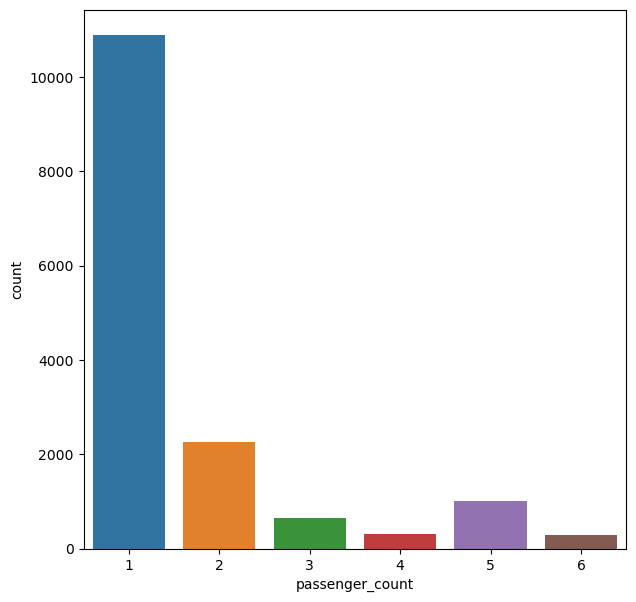

In [68]:
#passenger count visualization
plt.figure(figsize=(7,7))
sns.countplot(x="passenger_count", data=train)

# Observation:
#From the above graph we can observe that the most of the rides were availed by one or two passengers at a time.

#Drawing the plot for "passenger_count" vs "fare_amount"

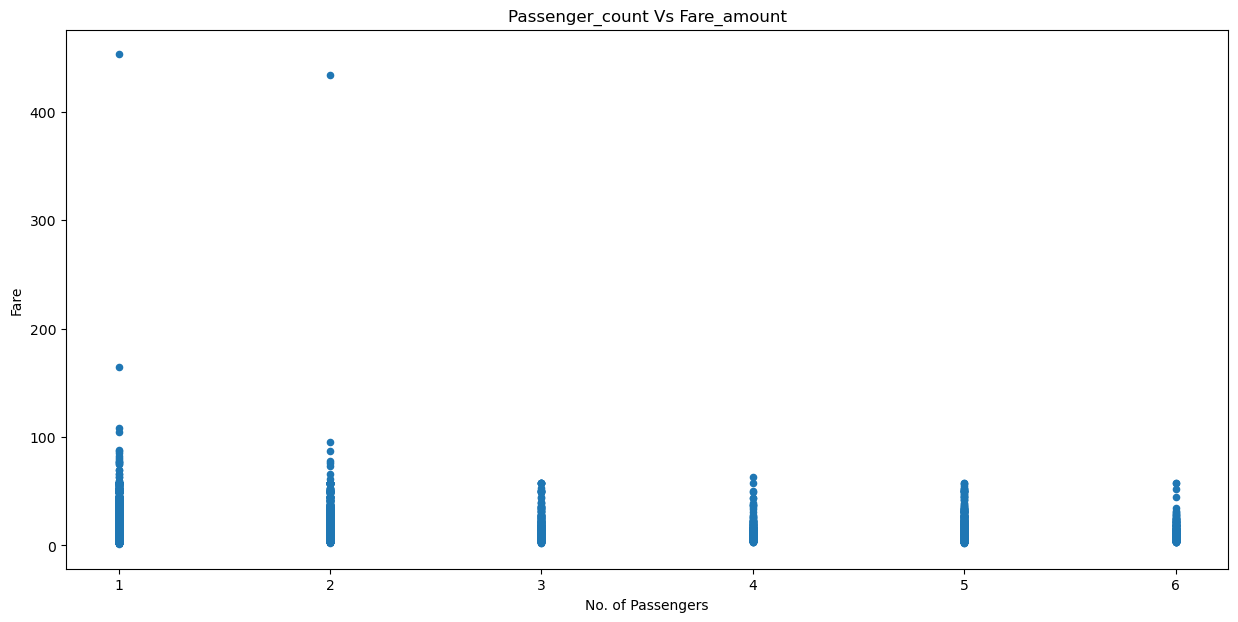

In [69]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=20) #s means here ,s=number of dots
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.title("Passenger_count Vs Fare_amount")
plt.show()

# Observation:
#From the above graph we can observe that the revenue is high from the rides availed by one or two passengers at a time

#Drawing the plot for "Date" vs "fare_amount"

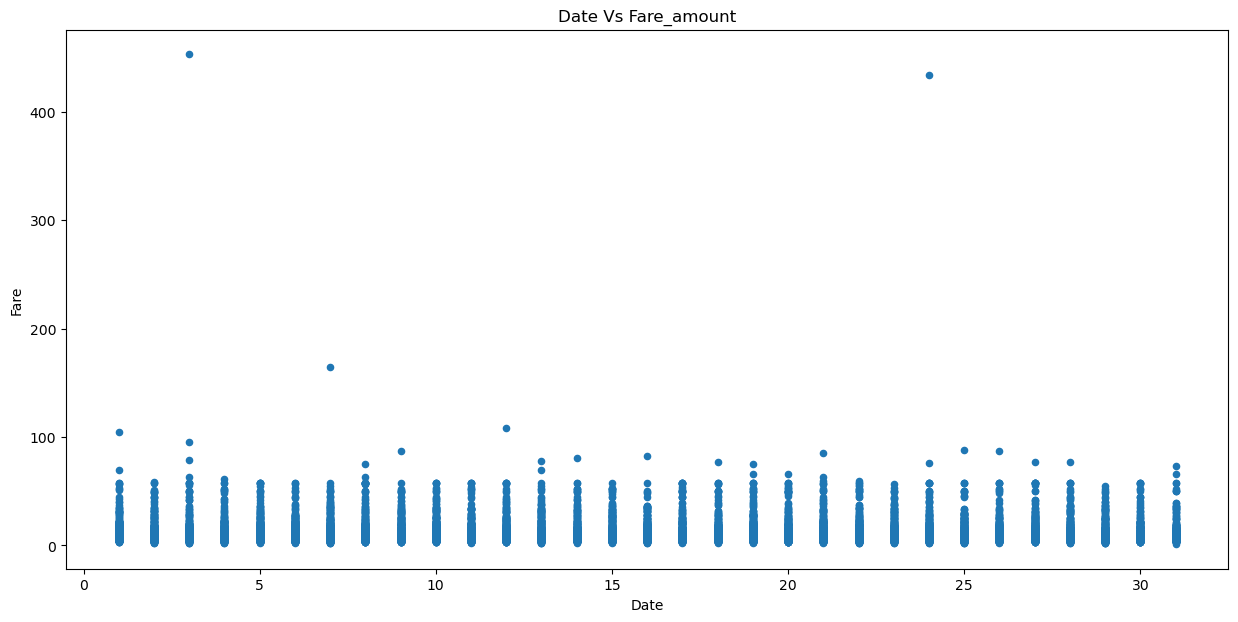

In [70]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=20)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.title("Date Vs Fare_amount")
plt.show()

# Observation:
#From the above graph we can see that highest fare was charged on 3rd and 24th of the month

#Plotting the graph for number of raids per hour in a day

In [ ]:
#graph for hourly cab bookings
plt.figure(figsize=(8,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.title("Hourly Cab Bookings")
plt.show()

# Observation:
#We can confirm that least number of rides were at 5AM and more rides most number of rides were taken at 6PM and 7PM, hence the more number of cars can be arranged at those rush hours.

#Plotting graph for "Hour" vs "fare_amount"

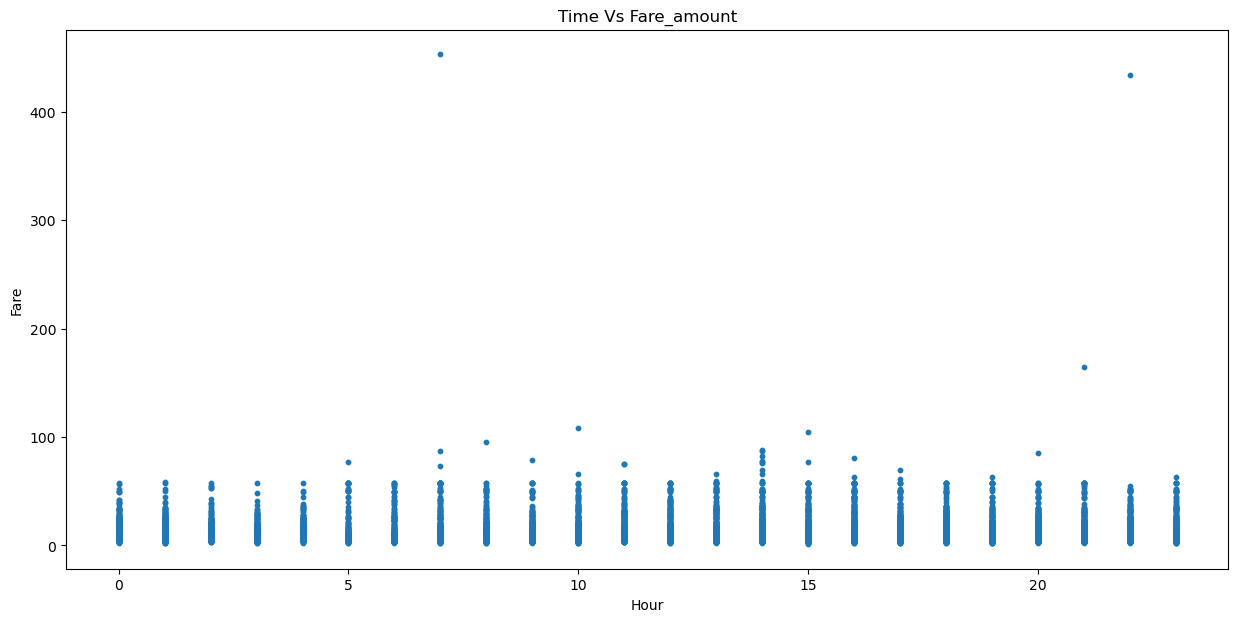

In [71]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.title("Time Vs Fare_amount")
plt.show()

# Observation:
#The highest fare was 8AM in the morning and 10PM in the night of a day.

#Graph for number of rides per day|

<AxesSubplot:xlabel='Day', ylabel='count'>

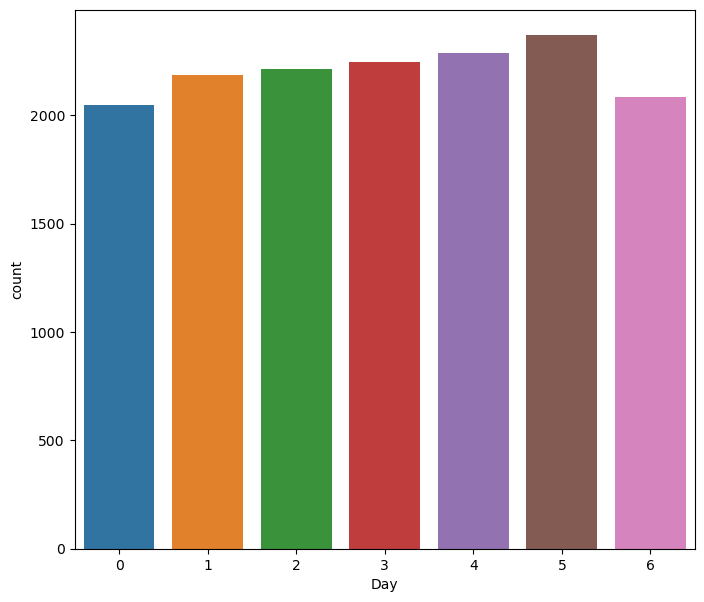

In [72]:
#impact of Day on the number of cab rides
plt.figure(figsize=(8,7))
sns.countplot(x="Day", data=train)

# Observation: 
#we can see that there is no much difference or variance among the days of the week, the day is not impacting much on the number of rides

#Graph for "Day" vs "fare_amount"

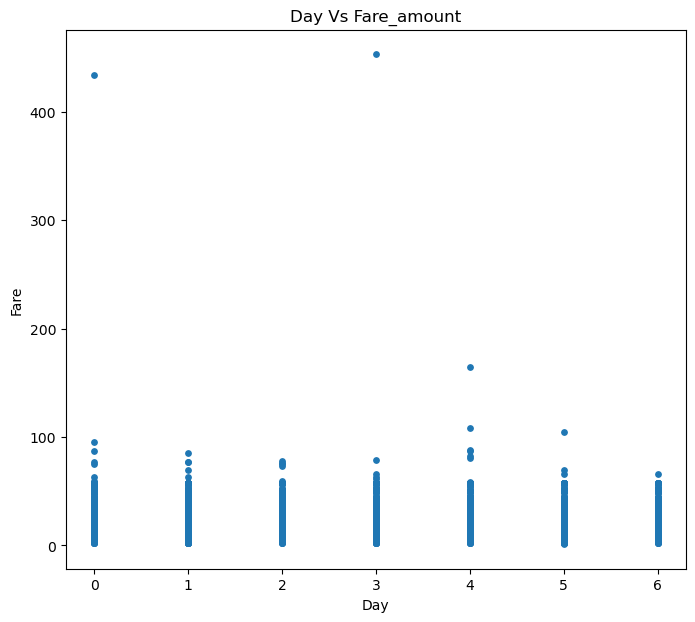

In [73]:
#Relationships between day and Fare
plt.figure(figsize=(8,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=15)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.title("Day Vs Fare_amount")
plt.show()

# Observation:
#The highest fare was charged on day0 and day3 i.e., Sunday and Wednesday.

#Graph between "Distance" vs "fare_amount"

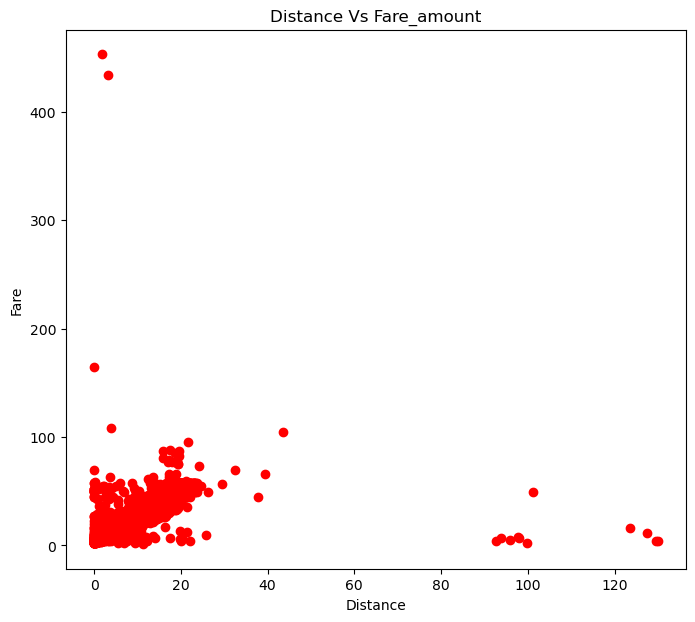

In [74]:
#Relationship between distance and fare 
plt.figure(figsize=(8,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title("Distance Vs Fare_amount")
plt.show()

# Observations:
#Most number of rides were taken in between the distance between 0 to 40kms, also the highest fare amount been charged with in this limit.

#Plotting the distribution of the columns "fare_amount" & "distance" in train dataset

fare_amount


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


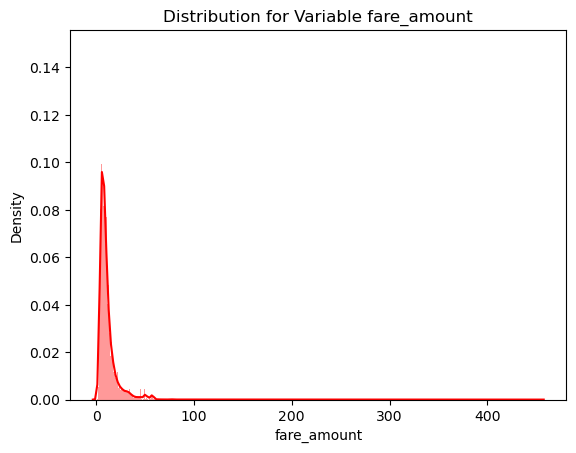

distance


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


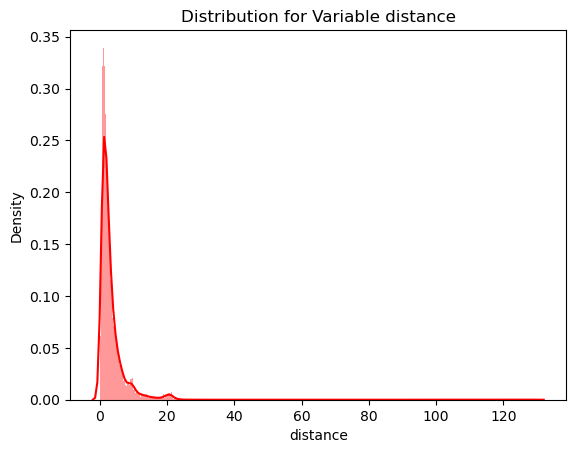

In [76]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

# Observations:
#the distribution of "fare_amount" & "distance" were right skewed in order to get right predictions we will transform the values of these two columns using logarithmic function.

#Transforming the values of columns "fare_amount" & "distance" on train dataset

In [77]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


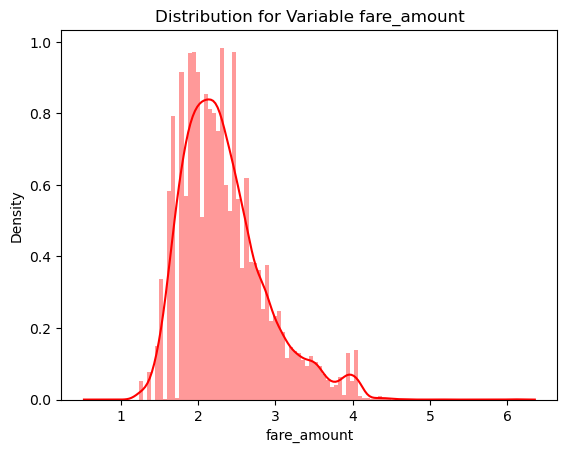

distance


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


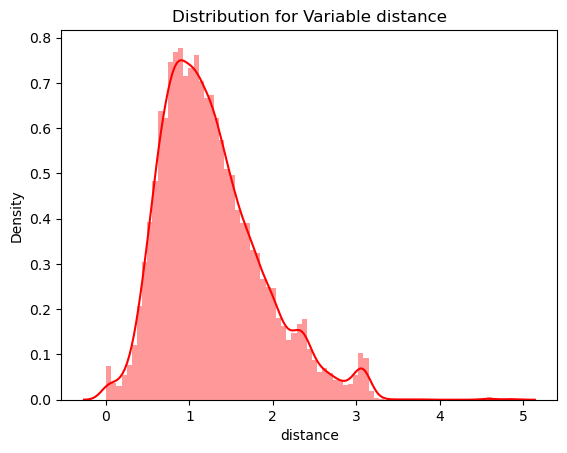

In [78]:
# Plotting the distributions of "fare_amount" & "distance" after transformation on train dataset
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

# Observations:
#the distributions of "fare_amount" & "distance" are not skewed and hence they are ready for the training of a model.

#Checking the distribution of "distaance" on the test dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


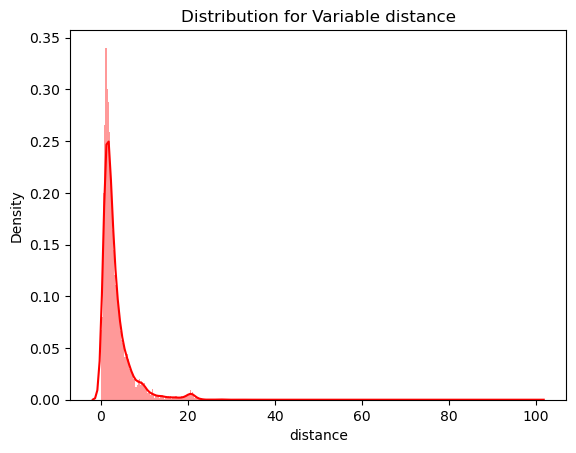

In [79]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='red')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Observation: 
#The distance in test dataset is skewed and needs a transformation before predicting the target label.

#Transforming the "distance" column on test dataset

In [80]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


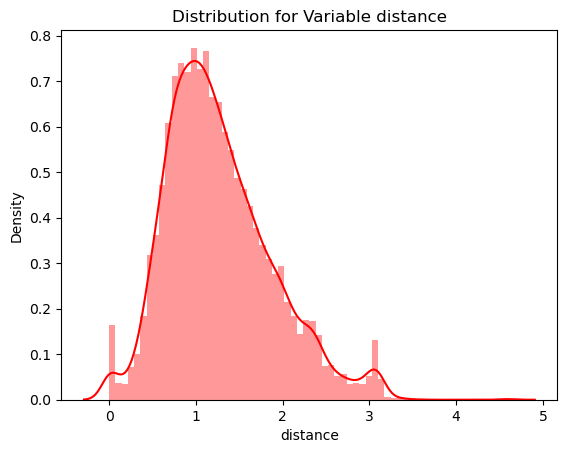

In [81]:
# Plotting the distribution of "distance" on test dataset
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='red')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Observation: 
#the "distance" distribution is not skewed and requires no further transformation.

In [82]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,2009,15,0,17,0.708412
1,2.884801,1,2010,2010,5,1,16,2.246029
2,1.902108,2,2011,2011,18,3,0,0.871095
3,2.163323,1,2012,2012,21,5,4,1.334809
4,1.840550,1,2010,2010,9,1,7,1.098331


In [83]:
# Preparing the input features and target label matrices
X=np.array(train.iloc[:,1:])
y=np.array(train.iloc[:,0])

In [84]:
#Splitting the dataset into train and test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# Linear Regression Model

In [85]:
#Training the data based on Linear Regression model
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [87]:
#Predicting the model on train data and test data
train_pred_lr=model_lr.predict(X_train)
test_pred_lr=model_lr.predict(X_test)

In [88]:
##calculating RMSE for test data
test_rmse_lr = np.sqrt(mean_squared_error(y_test, test_pred_lr))

##calculating RMSE for train data
train_rmse_lr= np.sqrt(mean_squared_error(y_train, train_pred_lr))

In [89]:
print("Root Mean Squared Error For Training data = ",train_rmse_lr)
print("Root Mean Squared Error For Test data = ",test_rmse_lr)


print("R2 score for training data is",r2_score(y_train,train_pred_lr))
print("R2 score for testing data is",r2_score(y_test,test_pred_lr))

Root Mean Squared Error For Training data =  0.2762019841074455
Root Mean Squared Error For Test data =  0.24628672006420377
R2 score for training data is 0.7479265933156383
R2 score for testing data is 0.7811405225793144


# Decision Tree Model

In [90]:
#Training the data using Decision Tree model
model_dt=DecisionTreeRegressor(max_depth=2)
model_dt.fit(X_train,y_train)
train_pred_dt=model_dt.predict(X_train)
test_pred_dt=model_dt.predict(X_test)

In [91]:
##calculating RMSE for test data
test_rmse_dt = np.sqrt(mean_squared_error(y_test, test_pred_dt))
##calculating RMSE for train data
train_rmse_dt= np.sqrt(mean_squared_error(y_train, train_pred_dt))

In [92]:
print("Root Mean Squared Error For Training data = ",train_rmse_dt)
print("Root Mean Squared Error For Test data = ",test_rmse_dt)


print("R2 score for training data is",r2_score(y_train,train_pred_dt))
print("R2 score for testing data is",r2_score(y_test,test_pred_dt))

Root Mean Squared Error For Training data =  0.2996210902077019
Root Mean Squared Error For Test data =  0.2867460617158617
R2 score for training data is 0.7033678616157003
R2 score for testing data is 0.7033268167661035


# Random Forest Regressor Model

In [93]:
#Training the data using Random Forest Regressor
model_rf=RandomForestRegressor(n_estimators=101)  #n_esimators means No.of Trees
model_rf.fit(X_train,y_train)
train_pred_rf=model_rf.predict(X_train)
test_pred_rf=model_rf.predict(X_test)

In [94]:
#calculating RMSE for test data
test_rmse_rf = np.sqrt(mean_squared_error(y_test, test_pred_rf))
#calculating RMSE for train data
train_rmse_rf= np.sqrt(mean_squared_error(y_train, train_pred_rf))

In [95]:
print("Root Mean Squared Error For Training data = ",train_rmse_rf)
print("Root Mean Squared Error For Test data = ",test_rmse_rf)


print("R2 score for training data is",r2_score(y_train,train_pred_rf))
print("R2 score for testing data is",r2_score(y_test,test_pred_rf))

Root Mean Squared Error For Training data =  0.09633796876442949
Root Mean Squared Error For Test data =  0.2392909845201166
R2 score for training data is 0.9693332033708648
R2 score for testing data is 0.7933972771351916


# Gradient Boosting Regressor Model

In [96]:
#training the data using Gradient Boosting model
model_gb=GradientBoostingRegressor()
model_gb.fit(X_train,y_train)
train_pred_gb=model_gb.predict(X_train)
test_pred_gb=model_gb.predict(X_test)

In [97]:
##calculating RMSE for test data
test_rmse_gb = np.sqrt(mean_squared_error(y_test, test_pred_gb))

##calculating RMSE for train data
train_rmse_gb= np.sqrt(mean_squared_error(y_train, train_pred_gb))

In [98]:
print("Root Mean Squared Error For Training data = ",train_rmse_gb)
print("Root Mean Squared Error For Test data = ",test_rmse_gb)


print("R2 score for training data is",r2_score(y_train,train_pred_gb))
print("R2 score for testing data is",r2_score(y_test,test_pred_gb))

Root Mean Squared Error For Training data =  0.2278465768661526
Root Mean Squared Error For Test data =  0.22814258725278425
R2 score for training data is 0.8284627438023151
R2 score for testing data is 0.812199781789624


# Hyperparameter tuning

#Parameter tuning for Random Forest model

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42) # If we don't give random_state(0 to 42) whenever we execute each time new value generated ;
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [114]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
##Random Search CV on Random Forest Model

model_rrf = RandomForestRegressor(random_state = 0) #rrf=Rondom forest regressor
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(model_rrf, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)#cv=changed version
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.23761684842855696


#Parameter tuning for Gradient Boosting Regressor

In [102]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25205774939967956


In [103]:
##Random Search CV on gradient boosting model

model_gbr = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25205774939967956


#Final parameter extraction for Random Forest Model

In [105]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_grf = gridcv_rf.predict(X_test)

#R^2
grf_r2 = r2_score(y_test, predictions_grf)
#Calculating RMSE
grf_rmse = np.sqrt(mean_squared_error(y_test,predictions_grf))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(grf_r2))
print('RMSE = ',(grf_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 17}
R-squared = 0.8.
RMSE =  0.2364371463281487


#Final parameter extraction for Gradient Boosting Model

In [106]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.23739342063769528


# Observations: 
#the final parameters were selected for both the random forest and Gradient Boosting models, the accuracy for both the models is same yet the error for Random forest model is less than that of the Gradient Boosting model.
#Hence we choose the Random Forest Model to predict the values for the "test.csv"

#Selection of the model: Random Forest Regressor Model

In [107]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_grf_test_Df = gridcv_rf.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [108]:
# Creating the target label on the "test"(test.csv)
predictions_grf_test_Df
test['Predicted_fare'] = predictions_grf_test_Df

In [109]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.317615
1,1,2015,1,27,1,13,1.231205,2.355332
2,1,2011,10,8,5,11,0.481579,1.670415
3,1,2012,12,1,5,21,1.085538,2.171950
4,1,2012,12,1,5,21,1.854312,2.726583


In [110]:
test.to_csv('test.csv')